In [96]:
import pandas as pd
import matplotlib.pyplot as plt

from SedCas import SedCas

import os 
import numpy as np

%matplotlib inline

## model run itself 

In [15]:
"""
Created on Thu Feb  3 16:56:57 2022

@author: hirschbe
"""

# from SedCas import SedCas
# 
# model = SedCas()
# model.load_climate()
# model.load_params()
# model.run_hydro()
# model.run_sediment()
# model.save_output()
# model.plot_sedyield_monthly()

# Qstl = potential sediment catchment output [mm], i.e. transport-limited case

'\nCreated on Thu Feb  3 16:56:57 2022\n\n@author: hirschbe\n'

## data from "looped" runs, plot monthly sediment yeld transporten in a form of DF 

In [58]:
# data
westhimal = pd.read_csv('timeseries/1_Western_Himalaya/Sediment.out', index_col = 0)
climate = pd.read_csv('timeseries/1_Western_Himalaya/climate.met', sep = '\t', index_col = 0)



In [67]:
climate.index = pd.to_datetime(climate.index)
climate.Ta.resample('y').mean().mean()
climate.Pr.resample('y').sum().mean()

1161.7870783247463

In [18]:
# 
## change unite: 
sediments = westhimal

# get area from parameters files: 
area = 4.83
cf = (area*10**6) * 10**-3   # km2 to m2 and mm to m

# qstl_area = pd.DataFrame(data = sedimentout.Qstl*cf, index=pd.to_datetime(sedimentout.index))
sediments_area = pd.DataFrame()
sediments_area['Qstl']  = sediments.Qstl *cf
sediments_area['Qdftl'] = sediments.Qdftl*cf

# qstl_area.set_index('D')
sediments_area.index = pd.to_datetime(sediments_area.index)


# monthly sediment yeild
sym = sediments_area.resample('m').sum()                         # sediment yeld month 
symm_westernhimal = sym.groupby(by=sym.index.month).mean()  # sediment yeld month mean 

symm_westernhimal = symm_westernhimal.reset_index()

In [19]:
df = symm_westernhimal

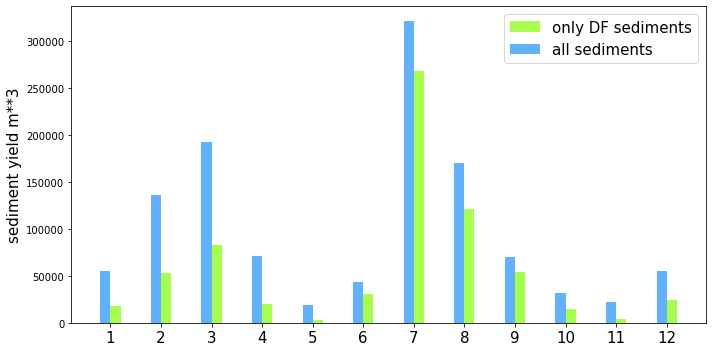

In [12]:
## figure to count all lakes

fig, ax = plt.subplots(figsize=(10, 5))

width = 0.2
ax.bar(x=df.D+0.1, height=df.Qdftl, width=width, label='only DF sediments',  alpha=0.7, color='chartreuse')
ax.bar(x=df.D-0.1,     height=df.Qstl, width=width,label='all sediments' , alpha=0.7, color= 'dodgerblue')

ax.set_xticks(df.D)
ax.set_xticklabels(df.D, fontsize=15)#rotation=45)
ax.legend(fontsize=15, )
ax.set_ylabel('sediment yield m**3', fontsize=15)
fig.tight_layout()

# fig.savefig('sed_yeld_3regions.pdf', bbox_inches='tight')

## magnitude frequency 

In [22]:
sediments_area.head()

Qstl  Qdftl
D                                      
1980-01-01 00:00:00     0.000000    0.0
1980-01-01 01:00:00     0.000000    0.0
1980-01-01 02:00:00  1107.737730    0.0
1980-01-01 03:00:00  1821.591262    0.0
1980-01-01 04:00:00  1756.875825    0.0

# plots: 

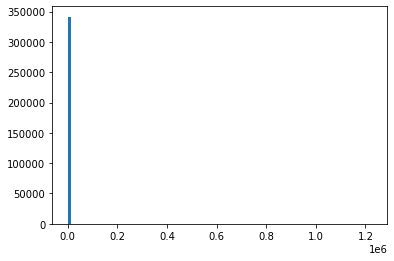

In [69]:
total = sediments_area.Qstl
dfs = sediments_area.Qdftl

plt.hist(dfs, bins = 100)
plt.show()

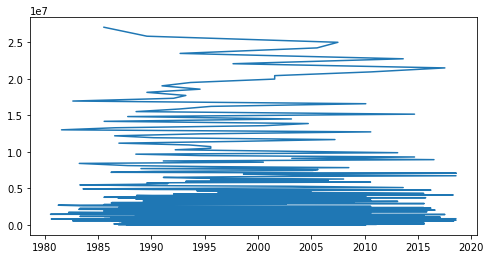

In [90]:
# plot the cumulative histogram

fig, ax = plt.subplots(figsize=(8, 4))
n_bins = 100
#n, bins, patches = ax.hist(dfs[dfs>0], n_bins, density=True, histtype='step',
#                           cumulative=True, label='Empirical')
#n, bins, patches = ax.hist(dfs[dfs>0])
import numpy as np
dfc = dfs[dfs>0].sort_values()
# dfc = np.cumsum(dfc)
ax.plot(dfc)

## dfs - take only thise > 0 

In [127]:
# a = sediments_area[sediments_area.Qdftl>0].sort_values(by="Qdftl")

# fig, ax = plt.subplots(figsize=(8, 4))
# dfc = np.cumsum(a.Qdftl)
# ax.plot(dfc)


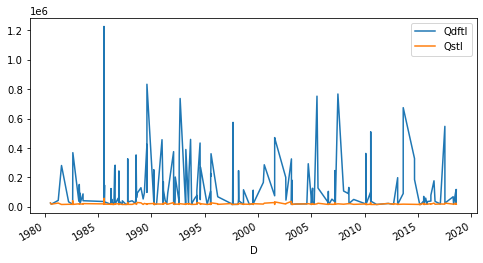

In [128]:

fig, ax = plt.subplots(figsize=(8, 4))
sediments_area.Qdftl.plot(label = 'Qdftl')
sediments_area.Qstl.plot(label = 'Qstl')

plt.legend()


[Text(0.5, 0, 'time'), Text(0, 0.5, 'sediment transport m**3')]

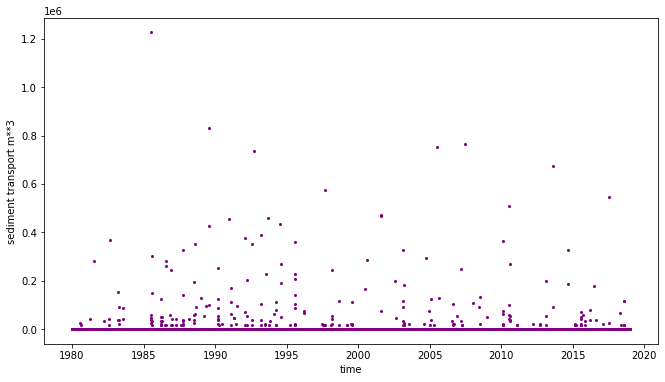

In [115]:
# Plot using matplotlib
fig, ax = plt.subplots(figsize=(11, 6))

ax.scatter(x=sediments_area.index,
           y=sediments_area['Qdftl'],
           marker="o",
           s=4,
           color="purple")

ax.set(xlabel="time", ylabel="sediment transport m**3")


In [129]:
sediments.head()

Q0  Q10  Q25  Q50  Q75  Q90  Q100      Qstl  Qdftl
D                                                                       
1980-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.000000    0.0
1980-01-01 01:00:00  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.000000    0.0
1980-01-01 02:00:00  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.229345    0.0
1980-01-01 03:00:00  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.377141    0.0
1980-01-01 04:00:00  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.363742    0.0

## magnitude frequency 

In [180]:
# pribability of exceedence 
# Exceedance probability equation:
# Probablity= (nâˆ’i + 1) / (n+1)

# where i is the rank order (smallest to largest) from 1 to n.
# Note that the limits of this equation vary from n/(n+1) ~ 1 for the smallest events and 1/(n+1) 
# for the largest events (i.e., the largest events have a very small exceedance probability).

# Sort data smallest to largest
sediments_area = sediments_area[sediments_area.Qdftl>0]
sediments_sorted = sediments_area.sort_values(by="Qdftl")

# Count total obervations
n = sediments_sorted.shape[0]

# Add a numbered column 1 -> n to use in return calculation for rank
sediments_sorted.insert(0, 'rank', range(1, 1 + n))

# Calculate probability - note you may need to adjust this value based upon the time period of your data
sediments_sorted["prob"] = ((n - sediments_sorted["rank"] + 1) / (n + 1))

sediments_sorted["return_period"] = (1 / sediments_sorted["prob"])



In [170]:

# # Sort data smallest to largest
# # sediments_area = sediments_area[sediments_area.Qstl>0]
# sediments_sorted = sediments_area.sort_values(by="Qstl")

# # Count total obervations
# n = sediments_sorted.shape[0]

# # Add a numbered column 1 -> n to use in return calculation for rank
# sediments_sorted.insert(0, 'rank_s', range(1, 1 + n))

# # Calculate probability - note you may need to adjust this value based upon the time period of your data
# sediments_sorted["prob_s"] = ((n - sediments_sorted["rank_s"] + 1) / (n + 1))

# sediments_sorted["return_period_s"] = (1 / sediments_sorted["prob_s"])



In [181]:
sediments.tail()

Q0  Q10  Q25  Q50  Q75  Q90  Q100  Qstl  Qdftl
D                                                                   
2018-12-31 20:00:00  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0
2018-12-31 21:00:00  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0
2018-12-31 22:00:00  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0
2018-12-31 23:00:00  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0
2019-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0

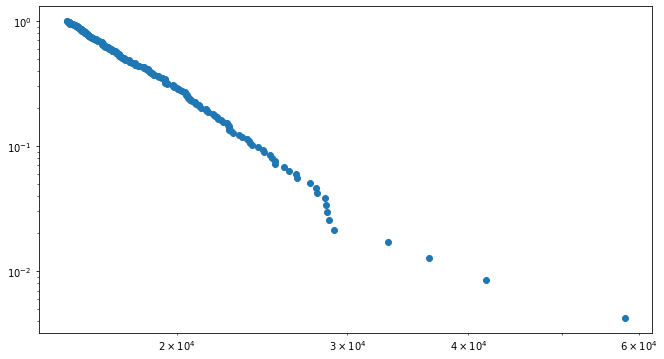

In [175]:
# # sediments_sorted

# # Compare both datasets
# fig, ax = plt.subplots(figsize=(11, 6))

# ax.scatter(x=sediments_sorted.Qstl.values,
#            y=sediments_sorted.prob_s.values)

# ax.set_xscale('log')
# ax.set_yscale('log')



In [185]:
sediments_sorted.head()#['year'] = 

rank          Qstl         Qdftl      prob  \
D                                                                 
1986-12-12 09:00:00     1  15374.730535  15374.730535  0.995763   
1997-08-11 20:00:00     2  15375.203642  15375.203642  0.991525   
2010-02-15 14:00:00     3  15412.242017  15412.242017  0.987288   
1997-07-19 00:00:00     4  15446.634678  15446.634678  0.983051   
1987-08-13 10:00:00     5  15468.672706  15468.672706  0.978814   

                     return_period  year  
D                                         
1986-12-12 09:00:00       1.004255  1986  
1997-08-11 20:00:00       1.008547  1997  
2010-02-15 14:00:00       1.012876  2010  
1997-07-19 00:00:00       1.017241  1997  
1987-08-13 10:00:00       1.021645  1987

In [184]:
sediments_sorted['year'] = sediments_sorted.index.year

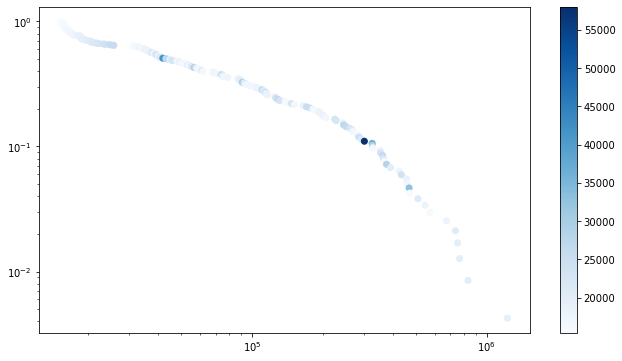

In [195]:
# sediments_sorted

# Compare both datasets
fig, ax = plt.subplots(figsize=(11, 6))

a=ax.scatter(x=sediments_sorted.Qdftl.values,
           y=sediments_sorted.prob.values, c = sediments_sorted.Qstl, cmap = 'Blues')

plt.colorbar(a)
ax.set_xscale('log')
ax.set_yscale('log')


In [152]:
ax

<AxesSubplot:>